# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


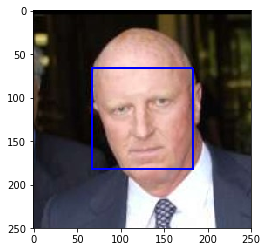

In [2]:
import sys
# Sorry I have ROS installed so I need to remove python2.7 path
ros_path = '/opt/ros/kinetic/lib/python2.7/dist-packages'

if ros_path in sys.path:
    sys.path.remove(ros_path)

import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
- Percentage of the first 100 images in `human_files` is 98%.
- Percentage of the first 100 images in `dog_files` is 12%.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def test_performance(function=face_detector, files=[]):
    count = 0
    for file in files:
        if function(file):
            count += 1
    return count*100/len(files)

print(test_performance(function=face_detector, files=human_files_short))
print(test_performance(function=face_detector, files=dog_files_short))

98.0
12.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [30]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                        transforms.ToTensor(),
                                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    
    img = Image.open(img_path)
    img = img_transform(img)
    img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()

    output = VGG16(img[None])
    probabilities = torch.exp(output)
    _, top_class = probabilities.topk(1, dim=1)
    index = top_class.item()
    return index # predicted class index

In [31]:
VGG16_predict('dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg')

226

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return True if index >= 151 and index <= 268 else False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
- Percentage of the first 100 images in `human_files` is 0%.
- Percentage of the first 100 images in `dog_files` is 99%.

In [32]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
print(test_performance(function=dog_detector, files=human_files_short))
print(test_performance(function=dog_detector, files=dog_files_short))

0.0
99.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [17]:
import os
from torchvision import datasets
import torchvision.transforms as transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Number of subprocesses to use for data loading
num_workers = 0
# How many samples per batch to load
batch_size = 20

# Convert data to torch.FloatTensor
train_transform = transforms.Compose([transforms.RandomRotation(20),
                                transforms.RandomResizedCrop(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
valid_transform = transforms.Compose([transforms.Resize((128,128)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the training and test datasets
train_data = datasets.ImageFolder('dogImages/train', transform=train_transform)
valid_data = datasets.ImageFolder('dogImages/valid', transform=valid_transform)
test_data = datasets.ImageFolder('dogImages/test', transform=valid_transform)

# Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           shuffle=False, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           shuffle=False, num_workers=num_workers)

loaders_scratch = {}
loaders_scratch['train'] = train_loader
loaders_scratch['valid'] = valid_loader
loaders_scratch['test'] = test_loader

Sanity Check to make sure everything looks right!

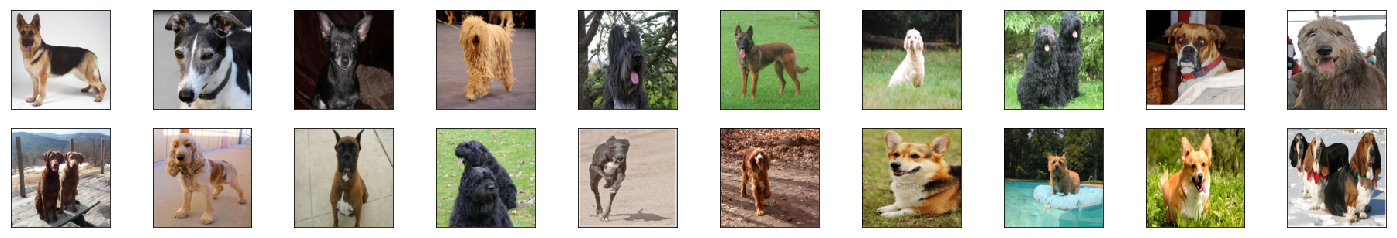

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
# obtain one batch of training images
dataiter = iter(valid_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- I resized and cropped the images to 128x128. I picked this size partly because my laptop would run out of memory with higher size. I could also reduce the batch size if I wanted to increase the size of the images, but it would train so slow.
- For augmentation, I chose **RandomRotation**, **RandomResizedCrop** and **RandomHorizontalFlip** in order to increase the number of training samples I have and add a bit of noise (not too much). I also applied normalization for all images with mean = 0.5 and std = 0.5. Normalization is also applied to valid and test datasets. 
- A few mistakes I made in this part: (1) I used RandomVerticalFlip initially without doing the sanity look at the images! (2) I didn't normalize the images and it took forever to train!
- What can I do better? (1) Find better normalized mean and standard deviation. (2) Increase image size. (3) Try a different model architecture.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # Convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # Convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # Convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # Linear layer (64 * 16 * 16 -> 1000)
        self.fc1 = nn.Linear(64 * 16 * 16, 1000)
        # Linear layer (1000 -> 133)
        self.fc2 = nn.Linear(1000, 133)
        # Dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        ## Define forward behavior
        # Apply convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # Flatten image input
        x = x.view(-1, 64 * 16 * 16)
        # Add dropout layer
        x = self.dropout(x)
        # Add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # Add dropout layer
        x = self.dropout(x)
        # Add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ In my model architecture, I have 3 convolutional layers, each of which is followed by a max pooling layer.
- 3 convolutional layers will increase the depth of the image tensor from 3 -> 16 -> 32 -> 64
- The max pool (kernel_size = stride = 2) will down-sample an image 's x-y dimensions by a factor of 2. Initially, the image's size is 128. In the end, the size is 128/2/2/2 = 16
- I also added a 25% dropout in the linear layers to reduce overfitting.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [21]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

In [9]:
# Image file is truncated error: 
# https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [10]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        accuracy = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss += loss.item()*data.size(0)
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss += loss.item()*data.size(0)
            # accuracy
            ps = torch.exp(output).data
            equality = (target.data == ps.max(1)[1])
            accuracy += equality.type_as(torch.FloatTensor()).sum()

        # calculate average losses
        train_loss = train_loss/len(train_loader.dataset)
        valid_loss = valid_loss/len(valid_loader.dataset)
        accuracy   = accuracy/len(test_loader.dataset)
    
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tAccuracy: {:.2f}%'.format(
            epoch, 
            train_loss,
            valid_loss,
            100.*accuracy
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
    # return trained model
    return model

In [27]:
# train the model
model_scratch = train(200, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.602090 	Validation Loss: 4.516069 	Accuracy: 4.78%
Validation loss decreased (inf --> 4.516069).  Saving model ...
Epoch: 2 	Training Loss: 4.573066 	Validation Loss: 4.479507 	Accuracy: 5.50%
Validation loss decreased (4.516069 --> 4.479507).  Saving model ...
Epoch: 3 	Training Loss: 4.543615 	Validation Loss: 4.459452 	Accuracy: 5.14%
Validation loss decreased (4.479507 --> 4.459452).  Saving model ...
Epoch: 4 	Training Loss: 4.522718 	Validation Loss: 4.423673 	Accuracy: 5.98%
Validation loss decreased (4.459452 --> 4.423673).  Saving model ...
Epoch: 5 	Training Loss: 4.494928 	Validation Loss: 4.400111 	Accuracy: 5.14%
Validation loss decreased (4.423673 --> 4.400111).  Saving model ...
Epoch: 6 	Training Loss: 4.486370 	Validation Loss: 4.390079 	Accuracy: 6.94%
Validation loss decreased (4.400111 --> 4.390079).  Saving model ...
Epoch: 7 	Training Loss: 4.470240 	Validation Loss: 4.354315 	Accuracy: 7.30%
Validation loss decreased (4.390079 --> 4.354

Epoch: 83 	Training Loss: 2.769135 	Validation Loss: 4.239874 	Accuracy: 13.16%
Epoch: 84 	Training Loss: 2.745055 	Validation Loss: 4.230427 	Accuracy: 14.00%
Epoch: 85 	Training Loss: 2.744751 	Validation Loss: 4.293290 	Accuracy: 13.64%
Epoch: 86 	Training Loss: 2.700641 	Validation Loss: 4.207349 	Accuracy: 12.92%
Epoch: 87 	Training Loss: 2.689823 	Validation Loss: 4.365287 	Accuracy: 14.23%
Epoch: 88 	Training Loss: 2.689424 	Validation Loss: 4.259888 	Accuracy: 12.56%
Epoch: 89 	Training Loss: 2.696622 	Validation Loss: 4.406421 	Accuracy: 13.88%
Epoch: 90 	Training Loss: 2.655906 	Validation Loss: 4.285608 	Accuracy: 13.40%
Epoch: 91 	Training Loss: 2.652458 	Validation Loss: 4.468861 	Accuracy: 12.68%
Epoch: 92 	Training Loss: 2.633343 	Validation Loss: 4.306229 	Accuracy: 14.23%
Epoch: 93 	Training Loss: 2.635403 	Validation Loss: 4.380370 	Accuracy: 14.35%
Epoch: 94 	Training Loss: 2.574830 	Validation Loss: 4.248615 	Accuracy: 13.88%
Epoch: 95 	Training Loss: 2.574177 	Vali

Epoch: 185 	Training Loss: 1.683084 	Validation Loss: 5.223984 	Accuracy: 14.11%
Epoch: 186 	Training Loss: 1.687473 	Validation Loss: 5.235296 	Accuracy: 14.11%
Epoch: 187 	Training Loss: 1.677673 	Validation Loss: 5.316541 	Accuracy: 13.40%
Epoch: 188 	Training Loss: 1.661899 	Validation Loss: 5.220398 	Accuracy: 14.23%
Epoch: 189 	Training Loss: 1.606208 	Validation Loss: 5.427458 	Accuracy: 12.44%
Epoch: 190 	Training Loss: 1.680562 	Validation Loss: 5.304291 	Accuracy: 12.80%
Epoch: 191 	Training Loss: 1.661050 	Validation Loss: 5.234600 	Accuracy: 13.76%
Epoch: 192 	Training Loss: 1.716086 	Validation Loss: 5.468462 	Accuracy: 13.88%
Epoch: 193 	Training Loss: 1.652496 	Validation Loss: 5.354292 	Accuracy: 15.31%
Epoch: 194 	Training Loss: 1.643804 	Validation Loss: 5.338675 	Accuracy: 14.11%
Epoch: 195 	Training Loss: 1.690831 	Validation Loss: 5.173571 	Accuracy: 14.35%
Epoch: 196 	Training Loss: 1.630887 	Validation Loss: 5.309384 	Accuracy: 13.76%
Epoch: 197 	Training Loss: 1

In [25]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [11]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [28]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 5.101332


Test Accuracy: 15% (133/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [12]:
import torch
import torchvision.models as models
import torch.nn as nn
import os
from torchvision import datasets
import torchvision.transforms as transforms
import torch
## TODO: Specify data loaders
# Number of subprocesses to use for data loading
num_workers = 5
# How many samples per batch to load
batch_size = 4

# Convert data to torch.FloatTensor
train_transform = transforms.Compose([transforms.RandomRotation(20),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
valid_transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load the training and test datasets
train_data = datasets.ImageFolder('dogImages/train', transform=train_transform)
valid_data = datasets.ImageFolder('dogImages/valid', transform=valid_transform)
test_data = datasets.ImageFolder('dogImages/test', transform=valid_transform)

# Prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           shuffle=True, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           shuffle=False, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                           shuffle=False, num_workers=num_workers)

loaders_transfer = {}
loaders_transfer['train'] = train_loader
loaders_transfer['valid'] = valid_loader
loaders_transfer['test'] = test_loader

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [13]:
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
model_transfer = models.densenet121(pretrained=True)
from collections import OrderedDict

# Freeze training for all "features" layers
for param in model_transfer.features.parameters():
    param.requires_grad = False
    
classifier = torch.nn.Sequential(OrderedDict([
                          ('output', nn.Linear(1024, 133)),
                          ]))
    
model_transfer.classifier = classifier

if use_cuda:
    model_transfer = model_transfer.cuda()

/home/minhkhang1795/.local/lib/python3.5/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ One of the reasons why I used densenet121 transfer model is because the size of its weights is relatively small (30Mb) compared to other models. However, in order to use this model, I had to decrease the batch_size to 4 so that my Cuda would not run out of memory. In general, densenet121 is suitable for many image recognition projects, especially for the subtle ones like dog classification. In densenet's architechture, every layer is connected directly with other layers to ensure maximum information (and gradient) flow, which allows the gradients not to vanish when reaching the other end.

Using this model, first I need to freeze all the weights in the "features" layers. The classifier of densenet121 is pretty straight forward, and I just need to replace it with my own classifier.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [14]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [15]:
# train the model
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 3.844915 	Validation Loss: 1.879570 	Accuracy: 57.54%
Validation loss decreased (inf --> 1.879570).  Saving model ...
Epoch: 2 	Training Loss: 2.603541 	Validation Loss: 1.087666 	Accuracy: 70.57%
Validation loss decreased (1.879570 --> 1.087666).  Saving model ...
Epoch: 3 	Training Loss: 2.182103 	Validation Loss: 0.932276 	Accuracy: 74.88%
Validation loss decreased (1.087666 --> 0.932276).  Saving model ...
Epoch: 4 	Training Loss: 1.951926 	Validation Loss: 0.794923 	Accuracy: 77.87%
Validation loss decreased (0.932276 --> 0.794923).  Saving model ...
Epoch: 5 	Training Loss: 1.857277 	Validation Loss: 0.706603 	Accuracy: 78.83%
Validation loss decreased (0.794923 --> 0.706603).  Saving model ...
Epoch: 6 	Training Loss: 1.754593 	Validation Loss: 0.669141 	Accuracy: 79.19%
Validation loss decreased (0.706603 --> 0.669141).  Saving model ...
Epoch: 7 	Training Loss: 1.722002 	Validation Loss: 0.629877 	Accuracy: 80.38%
Validation loss decreased (0.669141 --

In [15]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [17]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.683870


Test Accuracy: 79% (668/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [16]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image
    img_transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    img = Image.open(img_path)
    img = img_transform(img)
    img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
    output = model_transfer(img[None])
    # convert output probabilities to predicted class
    pred = output.data.max(1, keepdim=True)[1]
    return class_names[pred]

In [17]:
# Test the function
predict_breed_transfer('dogImages/train/002.Afghan_hound/Afghan_hound_00082.jpg')

'Afghan hound'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [18]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    # Show the image
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    
    # Handle cases for a human face, dog, and neither
    if face_detector(img_path):
        # human
        print('Hello human!')
        print('You look like a', predict_breed_transfer(img_path))
    elif dog_detector(img_path):
        # dog
        print('There is a dog!')
        print('It\'s', predict_breed_transfer(img_path))
    else:
        print('Oophs, an error occurred. Please try again!')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ It classifies dog vs human fairly well and only got one incorrect case that it could not determine whether the image contains a dog or a human.
Some points of improvement:
- The `face_detector` algorithm is very finicky, and it does not perform very well for ~90% of the time. Exploring other algorithms would probably improve the performance. However, the current algorithms are fast and easy to implement.
- The accuracy of the `predict_breed_transfer` is still relatively low (80% for the test dataset). I could improve the model or train it longer.
- I could also have a better image augmentation like using different means and standard deviations or applying other augmentation strategies.

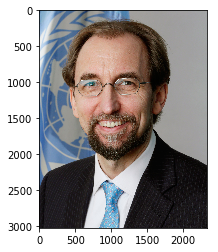

Hello human!
You look like a Afghan hound
----------------------------------------


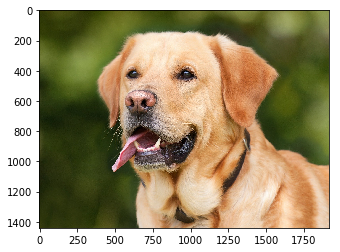

There is a dog!
It's Afghan hound
----------------------------------------


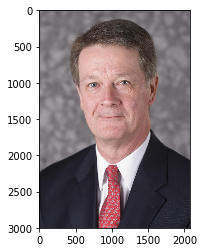

Hello human!
You look like a Afghan hound
----------------------------------------


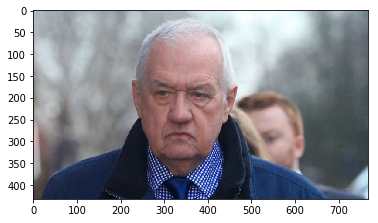

Hello human!
You look like a Afghan hound
----------------------------------------


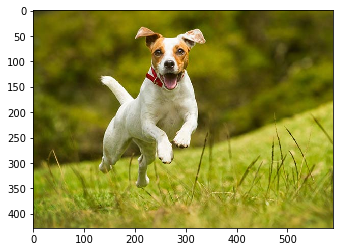

Hello human!
You look like a Afghan hound
----------------------------------------


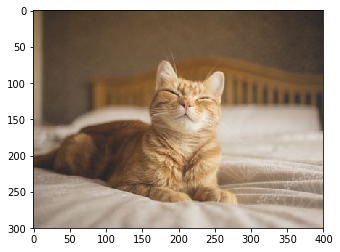

Oophs, an error occurred. Please try again!
----------------------------------------


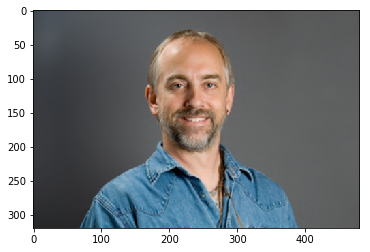

Hello human!
You look like a Afghan hound
----------------------------------------


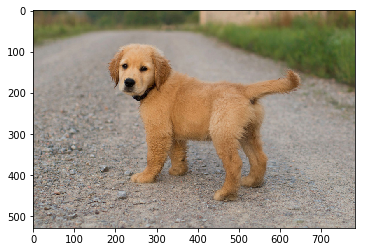

There is a dog!
It's Afghan hound
----------------------------------------


In [33]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## Hello strangers, sorry for using your images!
my_files = np.array(glob("myfiles/*"))
for file in my_files:
    run_app(file)
    print('----------------------------------------')